In [1]:
from konlpy.tag import Kkma
from nltk.tag import pos_tag
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize
from nltk import Text
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
emma = Text(word_tokenize(corpus), name='Emma')

In [3]:
sum([_[1] for _ in emma.vocab().most_common(100)])

119726

In [4]:
# Emma 의 갯수
emma.count('Emma'), emma.vocab().freq('Emma'),\
emma.vocab().get('Emma')

(855, 0.004458117162447532, 855)

In [5]:
# Emma 근처에 자주 보이는 단어 
emma.similar('Emma',5) \

she it he i weston


In [6]:
emma.count('she')

1774

In [12]:
# 자주 나오는 패턴
emma.collocation_list()

['Mr. Knightley',
 'Mrs. Weston',
 'Frank Churchill',
 'Mr. Elton',
 'Miss Woodhouse',
 'Miss Bates',
 'Mrs. Elton',
 'Miss Fairfax',
 'Mr. Weston',
 'Jane Fairfax',
 'every thing',
 'Mr. Woodhouse',
 'every body',
 'young man',
 'great deal',
 'dare say',
 'Maple Grove',
 'Mrs. Goddard',
 'John Knightley',
 'Miss Smith']

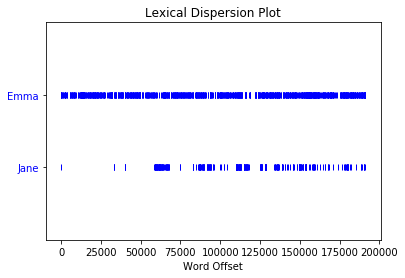

<function matplotlib.pyplot.show(*args, **kw)>

In [11]:
# Emma는 소설 주인공이므로 처음부터 끝까지 아주 자주 나옴
import matplotlib.pyplot as plt # 이렇게
emma.dispersion_plot(['Emma', 'Jane']) # Jane과 비교
plt.show

In [14]:
# 이제 한국어 
from konlpy.corpus import kolaw, kobill

In [21]:
# 얘네도 말뭉치 모음집
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [16]:
kolaw = Text(word_tokenize(kolaw.open(kolaw.fileids()[0]).read()))

In [18]:
kolaw.vocab().most_common(10)

[('.', 357),
 (',', 101),
 ('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50)]

In [26]:
len(kolaw), len(set(kolaw)), \
sum([_[1] for _ in kolaw.vocab().most_common(20)])

(4640, 2023, 1312)

In [27]:
# unique 한 단어는 약 2000개,
# 상위 20개의 단어들이 전체 4640 개 단어 중 1312개! 
1312/4640 # 이만큼 차지

0.2827586206896552

In [28]:
# remember that in English, 아주 흔한 단어들이 대부분을 차지
# 예를 들어 'she'를 가지고 어느 맥락에서 나왔는 지 등 분석을 할 수 없다.
emma.vocab().most_common(50)

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452),
 ('was', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('in', 2103),
 ('it', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729),
 ('you', 1664),
 ('had', 1605),
 ('as', 1387),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1091),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 590)]

In [29]:
kolaw.vocab().most_common(10)

[('.', 357),
 (',', 101),
 ('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50)]

## 형태소 분석기
- 좀더 정확한 분석

In [38]:
# 형태소 분석기
from konlpy.tag import Kkma # 꼬꼬마는 좀 느리다

In [39]:
ma = Kkma().morphs

In [40]:
from konlpy.corpus import kolaw, kobill # 다시 불러주기
corpus = kolaw.open(kolaw.fileids()[0]).read()
law = Text(ma(corpus)) # 형태소 분석기 하고 Text로 wrap해주기

In [41]:
law.vocab().most_common(20) # 형태소별!

[('의', 532),
 ('하', 457),
 ('.', 359),
 ('에', 328),
 ('는', 281),
 ('ㄴ다', 243),
 ('ㄴ', 234),
 ('을', 232),
 ('은', 195),
 ('이', 192),
 ('저', 155),
 ('여', 149),
 ('·', 145),
 ('ㄹ', 141),
 ('조', 136),
 ('를', 135),
 ('법률', 121),
 ('되', 113),
 (',', 101),
 ('있', 99)]

In [42]:
len(law), len(set(law)), \
sum([_[1] for _ in law.vocab().most_common(50)]) 
# 형태소가 떨어지니 unique한 단어의 개수가 훨씬 줄었다 2000->1000

(10053, 1247, 6141)

In [43]:
law.count('국민'), law.similar('국민')

저 국가 법관 법원 대통령 대한민국 정부 조국 국회 공무원 재판 타인 판결 근로 여자 국회의원 법률안 법령 농지 운동


(69, None)

In [48]:
law.count('국회')

55

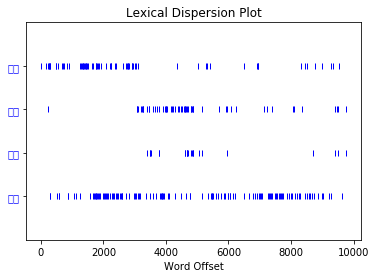

In [47]:
law.dispersion_plot(['국민', '국회', '의원', '법률'])
plt.show() # 국민과 법률은 앞에서부터 많이 나온다

In [50]:
law.vocab().freq('국민'), law.vocab().B() # 국민 빈도, unique 한 갯수

(0.006863622799164429, 1247)

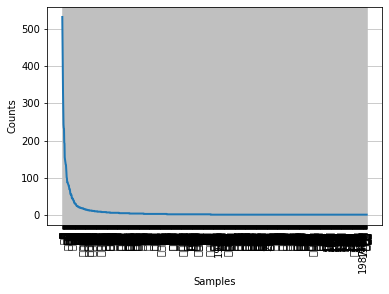

In [52]:
law.vocab().plot() # 글자 별 빈도, 보기 힘듦. 하지만 처음 몇 단어만 많이 나오고 쫙 떨어지는 형태 주목.

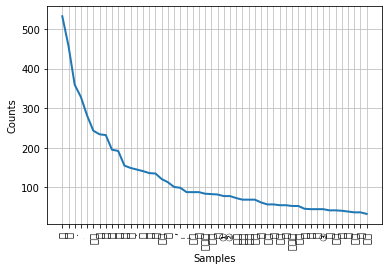

In [53]:
law.vocab().plot(50) # 상위 50개만 보면 이런 식.

In [273]:
# 이번엔 kobill
corpus = '\n'.join([kobill.open(_).read()
                    for _ in kobill.fileids()])

In [274]:
bill = Text(ma(corpus))

In [275]:
bill.vocab().N(), bill.vocab().B() # 전체 수, unique 수 비슷하다

(21695, 1489)

In [276]:
bill.vocab().most_common(30) # 육아 & 휴직!

[('--', 1121),
 ('하', 786),
 ('의', 737),
 ('.', 668),
 ('에', 450),
 ('ㄴ', 449),
 ('는', 350),
 ('을', 325),
 ('이', 324),
 (')', 298),
 ('(', 294),
 ('-', 278),
 ('저', 223),
 ('ㄴ다', 200),
 ('를', 189),
 (',', 186),
 ('아', 183),
 ('조', 180),
 ('1', 175),
 ('은', 162),
 ('육아', 160),
 ('제', 154),
 ('경우', 140),
 ('2', 132),
 ('과', 130),
 ('휴직', 128),
 ('되', 124),
 ('고', 123),
 ('따르', 122),
 ('항', 120)]

In [277]:
bill.count('육아'), bill.count('휴직')

(160, 128)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51649 missing from current f

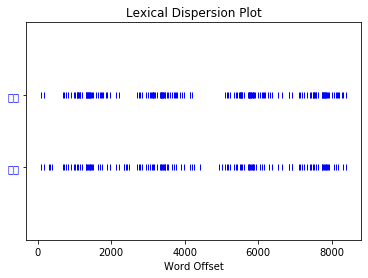

In [278]:
bill.dispersion_plot(['육아', '휴직'])

In [279]:
bill.similar('육아')

조 아 호 여 자녀 까지 차이 논의 하여 종류 결과 기회 심사 활성화 조치 정지


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current

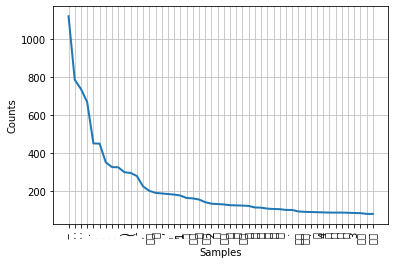

In [280]:
bill.vocab().plot(50) # 앞 law의 그림과 모양이 비슷함.
# 지프의 법칙 -> 순위와 빈도수가 반비례, 두번째 빈도수는 첫번째의 반일 것.

In [281]:
sortlaw = law.vocab().most_common(law.vocab().B())

In [282]:
sortlaw # 순위대로

[('의', 532),
 ('하', 457),
 ('.', 359),
 ('에', 328),
 ('는', 281),
 ('ㄴ다', 243),
 ('ㄴ', 234),
 ('을', 232),
 ('은', 195),
 ('이', 192),
 ('저', 155),
 ('여', 149),
 ('·', 145),
 ('ㄹ', 141),
 ('조', 136),
 ('를', 135),
 ('법률', 121),
 ('되', 113),
 (',', 101),
 ('있', 99),
 ('다', 88),
 ('정하', 88),
 ('수', 88),
 ('대통령', 84),
 ('의하', 83),
 ('과', 82),
 ('①', 78),
 ('②', 78),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('또는', 69),
 ('로', 62),
 ('으로', 57),
 ('지', 57),
 ('국회', 55),
 ('때', 55),
 ('아니하', 53),
 ('관하', 53),
 ('그', 46),
 ('며', 45),
 ('가', 45),
 ('③', 45),
 ('와', 42),
 ('회의', 42),
 ('받', 41),
 ('고', 39),
 ('모든', 37),
 ('바', 37),
 ('위하', 33),
 ('가지', 32),
 ('필요', 31),
 ('여야', 31),
 ('위원', 31),
 ('없', 30),
 ('국무', 30),
 ('1', 28),
 ('기타', 26),
 ('선거', 26),
 ('및', 25),
 ('3', 24),
 ('보장', 24),
 ('에서', 24),
 ('정부', 23),
 ('사항', 23),
 ('의원', 23),
 ('항', 22),
 ('자유', 21),
 ('권리', 21),
 ('국', 21),
 ('어야', 21),
 ('의무', 20),
 ('제', 20),
 ('④', 20),
 ('거나', 20),
 ('대하', 19),
 ('일', 19),
 ('2', 19),
 ('직무', 1

In [283]:
maxv = law.vocab()[law.vocab().max()] # 빈도 첫 번째인 애의 빈도 수
freq = [_[1]/maxv for _ in sortlaw]  # 첫 번째는 1일 것임

In [284]:
index = range(1, len(freq)+1)
order = [1/_ for _ in index] # 역순

<function matplotlib.pyplot.show(*args, **kw)>

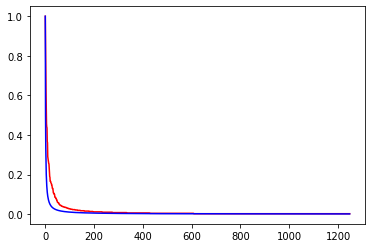

In [285]:
plt.plot(index, freq, 'r') # 실제 frequency
plt.plot(index, order, 'b-') # 역순
plt.show # 비슷함!

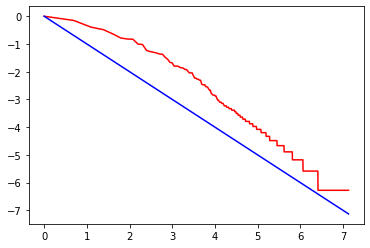

In [286]:
from math import log
plt.plot([log(_) for _ in index], [log(_) for _ in freq], 'r') # 실제 frequency
plt.plot([log(_) for _ in index], [log(_) for _ in order], 'b-')

In [287]:
# 중요한 단어는 중간부분에 있음! 너무 많이 나오는 단어는 보통 '불용어'
for _ in range(int(law.vocab().B()/100)):
    i = _*100
    print(i)
    print([_[0] for _ in sortlaw[i:i+100]])
    print()
    # 살펴보면 중요한, 의미있는 단어들은 중간부에 나옴.

0
['의', '하', '.', '에', '는', 'ㄴ다', 'ㄴ', '을', '은', '이', '저', '여', '·', 'ㄹ', '조', '를', '법률', '되', ',', '있', '다', '정하', '수', '대통령', '의하', '과', '①', '②', '국가', '헌법', '국민', '또는', '로', '으로', '지', '국회', '때', '아니하', '관하', '그', '며', '가', '③', '와', '회의', '받', '고', '모든', '바', '위하', '가지', '필요', '여야', '위원', '없', '국무', '1', '기타', '선거', '및', '3', '보장', '에서', '정부', '사항', '의원', '항', '자유', '권리', '국', '어야', '의무', '제', '④', '거나', '대하', '일', '2', '직무', '임명', '경제', '조직', '이상', '국회의원', '임기', '얻', '공무원', '경우', '법원', '의결', '기', '단체', '범위', '안', '장', '보호', '재판', '행정', '4', '정책']

100
['이르', '정당', '재판소', '재적', '어', '부터', '질', '노력', '요구', '국무총리', '관리', '년', '심판', '고는', '처분', '나', '집회', '시행', '출석', '찬성', '자문', '두', '대한민국', '안전', '공포', '조약', '법관', '다만', '⑤', '아니', '탄핵', '권한', '에게', '5', '6', '이나', '자', '기관', '중', '군사', '교육', '과반수', '까지', '중요', '통일', '어서', '개정', '효력', '체포', '절차', '당하', '근로', '인', '동의', '각부', '명령', '대법원', '대법원장', '지방', '자치', '기본', '질서', '생활', '제정', '투표', '도', '인정', '구속', '없이', '구성', '행위', '공공', '확정', 

In [288]:
TF - IDF
TF(Term Freq.) = 고빈도 단어에 가중치를 높이 주자
IDF (Inverse Doc. Freq.) = 저빈도 단어에 가중치를 높이 주자
TF * IDF => Weighting
 => d1 = (t1=.-, t2=.-, ...)

SyntaxError: invalid syntax (<ipython-input-288-63f912e13c22>, line 2)

In [289]:
# Heap's Law
# 문서의 길이가 늘어날 때 unique term 개수 예상
corpus = ''
# K = # 10 - 100
# beta = #0.4 - 0.6
dl = list()
ut = list()
for _ in kobill.fileids():
    corpus += kobill.open(_).read() # 합치기
    text = Text(ma(corpus))
    dl.append(text.vocab().N()) # document word
    ut.append(text.vocab().B()) # unique

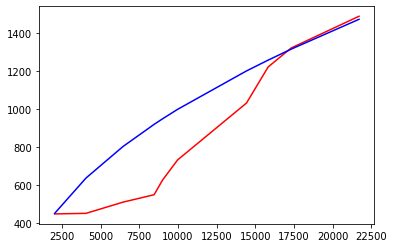

In [90]:
# 그림그려서 K 와 beta 값 찾기
K = 10
beta = 0.5
plt.plot(dl, ut, 'r-') # unique term
plt.plot(dl, [K*_**beta for _ in dl], 'b-') # unique term 예상 개수
plt.show()

In [ ]:
NLP의 목적 -> 사람들의 언어패턴을 연구하고자 함
Statistical Language Model
어떤 문단이 있을 때
s = '대한민국의 주권은 국민으로부터 나온다.'
term 1 = 대한민국의, 100 (freq)
t2 = 주권은, 10
t3 = 국민으로부터, 200
t4 = 나온다, 500
t5 = ., 1000
N(sentence 수) = 1000
P(t5) = freq(t5)/N = 1.0
P(t1) = 100/1000 = 0.1
그럼 P(s) = P(t1, t2, t3, t4, t5) = 결합확률(JointProb)
        = P(t3,t4,t5|t1,t2)P(t2|t1)P(t1) = ...
        = P(t5|t1,t2,t3,t4)P(t1,t2,t3,t4)
                           P(t4|t1,t2,t3)P(t3|t1,t2)P(t2|t1)P(t1)
if s' = '대한민국의 주권은 국민에게* 나온다',
    then t6 = '국민에게' and
         P(s') = P(t1,t2,t3,t6,t5) = 0 이 되어버림.
따라서 우린 1st Markov Assumption(Chain)을 한다
P(S)는 앞에 나온 모든 것들의 영향을 받는 게 아닌 바로 직전만 영향을 받음
      즉 P(S) = P(t5|(t1,t2,t3),t4)P(t4|(t1,t2),t3)P(t3|(t1),t2)P(t2|t1)P(t1)
              = P(t5|t4)P(t4|t3)P(t3|t2)P(t2|t1)P(t1)
이렇게 확률을 쪼개는 걸 N-gram, 위에처럼 두개로 쪼개는 걸 Bi-gram 이라고 함
P(t5|t4) = P(t4,t5)/P(t4)
         = freq(t4,t5)(/N)/freq(t4)(/N)
         = freq(t4,t5)/freq(t4) 

실제로,
P(?|t4) = sum(freq(?,t4)/freq(t4))
        = (t4,t1),(t4,t2),(t4,t3),(t4,t5),(t4,t6)
        = freq 이용

In [91]:
# 어절 단위 N-gram 만들기

In [290]:
def ngram_eojeol(s, N=2, opt = False): # N = 몇개로 나눌 건지
    token = s.split()
    ngram = list()
    for i in range(len(token)-(N-1)):
        ngram.append(''.join(token[i:i+N])
                    if opt else tuple(token[i:i+N]))
    return ngram

In [97]:
ngram_eojeol('대한민국의 주권은 국민에게 나온다')

[('대한민국의', '주권은'), ('주권은', '국민에게'), ('국민에게', '나온다')]

In [101]:
# 음절단위
def ngram_umjeol(s, N=2, opt = False):
    ngram = list()
    for i in range(len(s)-(N-1)):
        ngram.append(''.join(s[i:i+N])
                    if opt else tuple(s[i:i+N]))
    return ngram

In [102]:
ngram_umjeol('대한민국의 주권은 국민에게 나온다', 3)

[('대', '한', '민'),
 ('한', '민', '국'),
 ('민', '국', '의'),
 ('국', '의', ' '),
 ('의', ' ', '주'),
 (' ', '주', '권'),
 ('주', '권', '은'),
 ('권', '은', ' '),
 ('은', ' ', '국'),
 (' ', '국', '민'),
 ('국', '민', '에'),
 ('민', '에', '게'),
 ('에', '게', ' '),
 ('게', ' ', '나'),
 (' ', '나', '온'),
 ('나', '온', '다')]

In [ ]:
P('대한') = freq('대', '한') / freq('대')
            Bigram            Unigram

In [106]:
from collections import defaultdict
from konlpy.corpus import kolaw
NGRAM = defaultdict(lambda:0)
corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1):
    NGRAM[_] += 1

In [109]:
sum(NGRAM.values())

18884

In [110]:
N = sum(NGRAM.values())
NGRAM[('대',)]/N

0.008472781190425757

In [156]:
# bigram 이랑도 같이
from collections import defaultdict
from konlpy.corpus import kolaw
UNIGRAM = defaultdict(lambda:0)
BIGRAM = defaultdict(lambda:0)
corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1, True):
    UNIGRAM[_] += 1
for _ in ngram_umjeol(corpus, 2, True):
    BIGRAM[_] += 1

In [157]:
N = sum(NGRAM.values())
NGRAM[('대',)]/N

0.008472781190425757

In [158]:
for _ in filter(lambda k:k[0] == '대', BIGRAM.keys()):
    print(_, BIGRAM[_], BIGRAM[_]/UNIGRAM['대'])

대한 27 0.16875
대하 9 0.05625
대학 2 0.0125
대표 2 0.0125
대통 87 0.54375
대의 1 0.00625
대행 1 0.00625
대외 3 0.01875
대사 1 0.00625
대상 1 0.00625
대법 25 0.15625
대차 1 0.00625


In [159]:
find_key = lambda k, gram:filter(
    lambda tokens:''.join(tokens[:len(k)])== k, gram.keys())

In [160]:
list(find_key('대', UNIGRAM))

['대']

In [161]:
list(find_key('대한', BIGRAM))

['대한']

In [162]:
# lambda 이용, 이건 헷갈리니 그냥 무시하고 밑에 tri-gram 부분 보자
find_key = lambda k, gram:filter(
    lambda tokens:''.join(tokens[:len(k)]) == k, gram.keys())
find_value = lambda k, gram:\
    gram[k] if k in gram.keys() else 0
find_prob = lambda k, given, gram:\
    [(_, find_value(_, gram)/given) for _ in find_key(k, gram)]
find_max = lambda gram:\
    sorted(gram, key = lambda g:g[1], reverse = True)[0]

In [163]:
find_prob('대', find_value(list(find_key('대', UNIGRAM))[0], UNIGRAM), BIGRAM)

[('대한', 0.16875),
 ('대하', 0.05625),
 ('대학', 0.0125),
 ('대표', 0.0125),
 ('대통', 0.54375),
 ('대의', 0.00625),
 ('대행', 0.00625),
 ('대외', 0.01875),
 ('대사', 0.00625),
 ('대상', 0.00625),
 ('대법', 0.15625),
 ('대차', 0.00625)]

In [164]:
find_value(list(find_key('대', UNIGRAM))[0], UNIGRAM)

160

In [165]:
# 10번 돌렸을 때
key = '대'
for _ in range(10):
    nextkey = find_max(find_prob(key,
                                find_value(list(find_key(key, UNIGRAM))[0], UNIGRAM), BIGRAM))
    print(key, ''.join(nextkey[0][len(key):]), nextkey[1])
    key = ''.join(nextkey[0][len(key):])

대 통 0.54375
통 령 0.7699115044247787
령 은 0.2761904761904762
은   1.0
  국 0.05892135899263483
국 회 0.27384615384615385
회 의 0.4431137724550898
의   0.6396946564885496
  국 0.05892135899263483
국 회 0.27384615384615385


In [ ]:
# Tri-gram
P(?|t1, t2) = P(?, t1,t2)/P(t1,t2)
            freq(?, t1,t2)/freq(t1,t2)
            TRIGRAM        BIGRAM

In [291]:
from collections import defaultdict
from konlpy.corpus import kolaw
GRAM1 = defaultdict(lambda:0)
GRAM2 = defaultdict(lambda:0)
GRAM3 = defaultdict(lambda:0)

corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1, True):
    GRAM1[_] += 1
for _ in ngram_umjeol(corpus, 2, True):
    GRAM2[_] += 1
for _ in ngram_umjeol(corpus, 3, True):
    GRAM3[_] += 1

In [172]:
# 어떤 그램이든 key(Prior)를 찾아온다
def find_key(key, base):
    return list(filter(lambda keys:keys[:len(key)] == key,
                  base.keys()))

In [173]:
find_key('대한', GRAM3) # 대한 으로 시작하는 것들

['대한민', '대한국', '대한 ']

In [174]:
find_key('국민', GRAM3)

['국민은', '국민생', '국민투', '국민에', '국민으', '국민이', '국민을', '국민전', '국민의', '국민 ', '국민경']

In [182]:
# 확률적으로 '국민' 뒤에 뭐가 들어올까?
def find_prob(key, freq, base):
    return [(_, base[_], base[_]/freq if freq > 0 else 0) for _ in find_key(key, base)]

In [178]:
find_prob('국민', GRAM2['국민'], GRAM3)

[('국민은', 36, 0.5217391304347826),
 ('국민생', 1, 0.014492753623188406),
 ('국민투', 7, 0.10144927536231885),
 ('국민에', 3, 0.043478260869565216),
 ('국민으', 1, 0.014492753623188406),
 ('국민이', 2, 0.028985507246376812),
 ('국민을', 2, 0.028985507246376812),
 ('국민전', 1, 0.014492753623188406),
 ('국민의', 8, 0.11594202898550725),
 ('국민 ', 2, 0.028985507246376812),
 ('국민경', 6, 0.08695652173913043)]

In [188]:
# 가장 높은 확률 값 max를 찾고 싶다
def find_max(key, freq, base):
    return sorted(find_prob(key, freq, base), 
                  key = lambda _:_[-1], reverse = True)[0] # 제일 높은 애, 내림차순

# 출력
def ngram_print(key, n, base1, base2):   # n = 몇차 돌릴건지 base2 = 분자
    for _ in range(n):
        nextkey = find_max(key, base1[key], base2)
        print(key)
        print(nextkey)

        key = nextkey[0][-len(key):]

In [190]:
ngram_print('국민', 20, GRAM2, GRAM3) # 음절단위 분석, 확률적으로 문장 만들기

국민
('국민은', 36, 0.5217391304347826)
민은
('민은 ', 36, 1.0)
은 
('은 법', 47, 0.23618090452261306)
 법
(' 법률', 123, 0.831081081081081)
법률
('법률이', 60, 0.46875)
률이
('률이 ', 59, 0.9833333333333333)
이 
('이 정', 59, 0.3277777777777778)
 정
(' 정하', 54, 0.3724137931034483)
정하
('정하는', 50, 0.8928571428571429)
하는
('하는 ', 70, 0.9859154929577465)
는 
('는 바', 37, 0.10364145658263306)
 바
(' 바에', 37, 0.9736842105263158)
바에
('바에 ', 37, 1.0)
에 
('에 의', 86, 0.303886925795053)
 의
(' 의하', 72, 0.5538461538461539)
의하
('의하여', 66, 0.9166666666666666)
하여
('하여 ', 145, 0.7837837837837838)
여 
('여 국', 23, 0.1564625850340136)
 국
(' 국회', 78, 0.31451612903225806)
국회
('국회의', 45, 0.5056179775280899)


In [ ]:
# -> 만들어진 문장: 국민은 법률이 정하는 바에 의하여 국회의 ~.. '.'이 나올때까지 돌려서
# 문장 완성해봐라

## BPE
- 핵심 단어 찾기

In [ ]:
국 민 을 10
국 민 의 1
국 민 에 게 2

(국, 민) 13, (민, 을) 10, (민, 의), ...

국민 을 10
국민 의 1
국민 에 게 2
국민 => Embedding

In [292]:
# BPE
def convert_data(data): # {'문자열': 빈도}
    newdata = dict()
    for k, v in data.items():
        newdata[' '.join(list(k) + ['</w>'])] = v # 덮어쓰기
    return newdata

def find_pair(data): # 문자열 -> 쌍으로 변환
    pair = defaultdict(lambda:0)
    for k,v in data.items(): # l o w </w> : 5
        tokens = k.split() # [l, o, w, </w>]
        for i in range(len(tokens)-1): # (l,o):5, (o, w):5
            pair[tuple(tokens[i:i+2])] += v
    return pair

import re
def merge_pair(data, key): # max pattern -> 합치기
    newdata = dict()
    for k, v in data.items():
        newkey = re.sub(' '.join(key), ''.join(key), k) # 'e s'
        newdata[newkey] = v
    return newdata

In [293]:
data = convert_data({'low':5, 'lower':2, 'newest':6, 'widest':3})
pair = find_pair(data)

In [294]:
# pair 중 max 찾기
key = max(pair, key=pair.get)
key

('e', 's')

In [295]:
merge_pair(data,key)

{'l o w </w>': 5,
 'l o w e r </w>': 2,
 'n e w es t </w>': 6,
 'w i d es t </w>': 3}

In [296]:
data = convert_data({'low':5, 'lower':2, 'newest':6, 'widest':3})

for _ in range(5):
    pair = find_pair(data)
    key = max(pair, key=pair.get)
    data = merge_pair(data, key)
    
list (set([token for _ in data.keys() 
            for token in _.split() 
            if len(token) > 1 and token != '</w>']))

['low', 'est</w>']

In [297]:
# 에시
data = defaultdict(lambda:0)
for _ in corpus.split():
    if _.startswith('국민'):
        data[_] += 1

In [298]:
data

defaultdict(<function __main__.<lambda>()>,
            {'국민생활의': 1,
             '국민투표에': 3,
             '국민에게': 2,
             '국민으로부터': 1,
             '국민이': 2,
             '국민전체에': 1,
             '국민에': 1,
             '국민의': 7,
             '국민은': 35,
             '국민을': 1,
             '국민': 2,
             '국민경제의': 3,
             '국민경제자문회의를': 1,
             '국민투표의': 1,
             '국민투표사무에': 1,
             '국민경제상': 1})

In [299]:
cdata = convert_data(data)

for _ in range(5):
    pair = find_pair(cdata)
    key = max(pair, key = pair.get)
    cdata = merge_pair(cdata, key)
    
list (set([token for _ in cdata.keys() 
            for token in _.split() 
            if len(token) > 1 and token != '</w>']))

['의</w>', '국민의</w>', '국민은</w>', '국민']

In [ ]:
# '의'와 '국민'이 엄청 많다

In [308]:
# another example
notspell = re.compile('[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ \n\t]')
whitespace = re.compile('\s+')

In [312]:
for _ in kobill.fileids():
    corpus = kobill.open(_).read()
    corpus = notspell.sub(' ', corpus)
    corpus = whitespace.sub(' ', corpus)
    data = defaultdict(lambda:0)
    for _ in corpus.split():
        data[_] += 1
        
    data = convert_data(data)
        
    for _ in range(20):
        pair = find_pair(data)
        key = max(pair, key=pair.get)
        data = merge_pair(data, key)

    print(list(set([token for _ in data.keys() 
                for token in _.split() 
                if len(token) > 1 and not re.search(r'</w>', token)])))

['육아휴직', '아휴직', '휴직', '비용', '이하', '무원', '급여', '발생']
['육아휴직', '아휴직', '휴직', '비용', '이하', '무원', '급여', '발생']
['육아휴직', '육아', '휴직', '공무원', '이하', '무원', '급여', '발생']
['육아휴직', '경우', '고용', '아휴직', '휴직', '이하', '급여', '발생']
['하여', '학위', '간호', '수업연', '학사', '간호과']
['경우', '손해', '제3', '업자', '사업자', '원사업자']
['하여', '경우', '행정', '예고', '입법']
['국군', 'UAE', '파견', '201', '부대', '훈련']
['연장', '국군', '파견', '201', '부대', '국군부대', '해역']
['하여', '결혼', '결혼중개업', '제1', '중개', '조의', '제10', '결혼중개']


In [310]:
kobill.open(kobill.fileids()[1]).read() # 육아 휴직!

'국가공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9891\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제71조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n국가공무원법 일부개정법률안\n\n국가공무원법 일부를 다음과 같이 개정한다.\n\n제71조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제71조(휴직) ① (생  략)\n\n제71조(휴직) ① (현행과 같음)\n\n  ② 임용권자는 공무원이 다음 \n  ② -------------------------\n\n각 호의 어느 하나에 해당하는 \n\n----------------------------\n\n사유로 휴직을 원하면 휴직을 \n\n----------------------------\n\n명할 수 있다. 다만, 제4호의 \n\n-------------.---------------\n\n경우에는 대통령령으로 정하는 \n\n--------------------------

In [311]:
kobill.open(kobill.fileids()[-1]).read() # 결혼 중개! 잘 골라냈음을 볼 수 있다.

'결혼중개업의 관리에 관한 법률 일부개정법률안\n\n(한선교의원 대표발의 )\n\n 의 안\n 번 호\n\n9899\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 한선교․손범규․이인기 \n\n유성엽․이애주․이한성 \n\n안홍준․김태원․안형환 \n\n정갑윤 의원(10인)\n\n제안이유\n\n  최근 국제결혼의 상당수가 국제결혼중개업체를 통해 이루어지고 있\n\n으나, 일부 국제결혼중개업자가 이윤만을 추구하기 위하여 사실과 다\n\n른 정보나 거짓 정보를 제공하여 속성으로 성사된 국제결혼이 상대국\n\n과의 외교적 마찰이나 결혼생활의 조기 파탄을 야기하는 등 많은 문\n\n제가 발생하고 있음.\n\n  이에 따라 건전한 국제결혼문화를 정착하고 결혼중개업에 의한 피해\n\n사례를 최소화하기 위해 국제결혼중개업의 등록기준을 강화하고 국제\n\n결혼중개업자의 인권침해적․불법적인 결혼중개행위에 대한 처벌규정을 \n\n보다 강화하고자 함.\n\n  또한 국제결혼중개업자가 이용자와 상대방에게 제공하는 신상정보에 \n\n- 1 -\n\n\x0c- 2 -\n\n결혼생활 유지에 중대한 지장을 초래하는 정신질환 병력과 최근 10년간 \n\n금고 이상의 범죄경력을 포함하고, 신상정보(상대방 언어 번역본 포함)의 \n\n내용을 보존토록 하는 등 현행법의 운영상 나타나는 일부 미비점을 \n\n개선․보완함으로써 국제결혼중개업체의 건전한 영업을 유도하여 국제\n\n결혼 가정이 행복하게 생활하고 안정적으로 사회에 정착할 수 있도록 \n\n하려는 것임. \n\n주요내용\n\n  가. 국제결혼중개업 등록시 의무교육, 보증보험 가입 이외에 자본금 \n\n1억원 이상의 요건을 충족하도록 함(안 제4조제1항).\n\n  나. 이용자와 상대방에게 제공하여야 하는 신상정보에 정신질환의 \n\n병력 여부와 최근 10년 간의 금고 이상의 형의 범죄경력 등을 추\n\n가하고자 함(안 제10조의2제1항제2호 및 제4호).\n\n  다. 국제결혼중개업자에게 이용자와 상대방에게 제공한 신상

## 정리

In [ ]:
빅데이터 - 비정형데이터 - 텍스트 - 어떻게?
자연어처리! NLP
이유? 1. 온갖 잡다한 종류의 텍스트 포함
      2. for feature selection!
[Preprocessing]
1. split, splitlines -> 문서 - 문단(문장의 나열) - 단어(어절)의 조합 - 형태소 조합
2. tokenize! -> sent_tokenize, word_tokenize, regex_tokenize, Tweettokenize
                -> 구두점, .?!, '', "",  ,  ... 등등 여러 기준 
3. but 형태학적 접근 필요(형태소 분석). 
  - 우리말은 국민의, 국민에게, ... 형태소 분리가 필요! with Konlpy
    cf - 통사론적: 품사 정보 이용
        - 구문론적: ParseTree, 문법 이용. 주어-목적어-보어-술어 등 구성
4. LM(Language Model) 분석: 언어의 패턴(생성 확률 구하기)
    한계 Out of Vocabulary - 없는 단어가 엄청 많다
    Ngram - 빈도만으로 확률을 구하므로 본분에 없는 단어나 패턴 못 구함
5. Stem(어근/어간) 공통된 말 찾기
    WPM - BPE => 몇번 돌리면 핵심 단어 찾을 수 있다
6. Zipf's Law
    고빈도 단어(빈도의 대부분의 차지) - 오히려 너무 높으면 별로 안중요하다. 너무 흔함
7. Normalization
    대소문자, 약어, 신조어, 사전에 없는 단어, 명사 추정, '불용어'(stopwords) - 너무 흔한 단어 제거
8. RE

In [322]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt

In [314]:
sentence = '''
육성재는 3일 자신의 인스타그램에 “어제 저의 생일을 축하해주신 모든 멜로디 여러분 너무너무 감사드린다”고 말했다. 그러면서 그는 “어떻게 이야기를 꺼내야 할지 고민하다가 조금이라도 먼저 직접 얘기하는 게 맞을 것 같아서 글을 올린다”며 “많이 놀라시겠지만 5월 11일부로 군입대를 결정하게 됐다”고 밝혔다.
'''

In [315]:
print([_[1] for _ in Komoran().pos(sentence)])

['NNP', 'JX', 'SN', 'NNB', 'NNG', 'JKG', 'NNP', 'JKB', 'SS', 'NNP', 'NP', 'JKG', 'NNG', 'JKO', 'NNG', 'NNP', 'JX', 'MM', 'NNP', 'NNP', 'MAG', 'NNG', 'VV', 'EC', 'SS', 'JKQ', 'NNG', 'XSV', 'EP', 'EF', 'SF', 'MAJ', 'NP', 'JX', 'SS', 'VA', 'EC', 'NNG', 'JKO', 'VV', 'EC', 'VV', 'EC', 'NNG', 'XSV', 'EC', 'NNG', 'VCP', 'EC', 'MAG', 'MAG', 'NNG', 'XSV', 'ETM', 'NNG', 'VV', 'ETM', 'NNB', 'VA', 'EC', 'NNG', 'JKO', 'NNP', 'SS', 'VCP', 'EC', 'SS', 'MAG', 'VV', 'EP', 'EP', 'EC', 'NNP', 'NNB', 'JKB', 'NNG', 'NNG', 'JKO', 'NNG', 'XSV', 'EC', 'VV', 'EP', 'EC', 'SS', 'JKQ', 'VV', 'EP', 'EF', 'SF']


In [316]:
print([_[1] for _ in Kkma().pos(sentence)])

['NNG', 'NNG', 'JX', 'NR', 'NNM', 'NNG', 'JKG', 'NNG', 'NNG', 'NNM', 'JKM', 'SS', 'NNG', 'NNG', 'NNG', 'JKO', 'NNG', 'XSV', 'ECS', 'NNG', 'NNP', 'NNG', 'NP', 'MAG', 'NNG', 'VV', 'ECS', 'SS', 'NNG', 'VV', 'EPT', 'EFN', 'SF', 'VV', 'ECE', 'NP', 'JX', 'SS', 'VA', 'ECD', 'NNG', 'JKO', 'VV', 'ECD', 'VV', 'ECD', 'NNG', 'XSV', 'ECD', 'NNG', 'VCP', 'ECD', 'MAG', 'NNG', 'NNG', 'XSV', 'ETD', 'NNB', 'JKS', 'VV', 'ETD', 'NNB', 'VA', 'ECD', 'NNG', 'JKO', 'VV', 'ECS', 'SS', 'JC', 'SS', 'MAG', 'VV', 'EPH', 'EPT', 'ECE', 'NR', 'NNM', 'NR', 'NNG', 'JKM', 'NNG', 'NNG', 'JKO', 'NNG', 'XSV', 'ECD', 'VV', 'EPT', 'ECS', 'SS', 'NNG', 'VV', 'EPT', 'EFN', 'SF']


In [323]:
print([_[1] for _ in Okt().pos(sentence)])

['Foreign', 'Noun', 'Josa', 'Number', 'Noun', 'Josa', 'Noun', 'Josa', 'Foreign', 'Noun', 'Noun', 'Josa', 'Noun', 'Josa', 'Noun', 'Verb', 'Noun', 'Noun', 'Noun', 'Adverb', 'Adverb', 'Noun', 'Verb', 'Foreign', 'Noun', 'Noun', 'Verb', 'Punctuation', 'Adjective', 'Noun', 'Josa', 'Foreign', 'Adjective', 'Noun', 'Josa', 'Verb', 'Verb', 'Noun', 'Verb', 'Noun', 'Josa', 'Noun', 'Noun', 'Noun', 'Verb', 'Noun', 'Verb', 'Noun', 'Adjective', 'Noun', 'Josa', 'Noun', 'Foreign', 'Noun', 'Foreign', 'Adverb', 'Verb', 'Number', 'Number', 'Foreign', 'Noun', 'Josa', 'Noun', 'Verb', 'Verb', 'Foreign', 'Noun', 'Verb', 'Punctuation', 'Foreign']


In [317]:
print([_[1] for _ in Hannanum().pos(sentence)]) # 다 다름

['N', 'J', 'N', 'N', 'J', 'N', 'J', 'N', 'N', 'J', 'N', 'J', 'N', 'X', 'E', 'P', 'E', 'M', 'N', 'N', 'M', 'N', 'N', 'X', 'E', 'S', 'P', 'E', 'N', 'J', 'N', 'N', 'J', 'P', 'E', 'P', 'E', 'N', 'X', 'E', 'N', 'J', 'E', 'J', 'M', 'M', 'N', 'X', 'E', 'N', 'J', 'P', 'E', 'N', 'P', 'E', 'N', 'J', 'N', 'N', 'J', 'P', 'E', 'N', 'N', 'J', 'N', 'J', 'N', 'X', 'E', 'N', 'P', 'E', 'S']


In [319]:
Hannanum().tagset # 어미로 나누는 갯수가 적은 편

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}